# TP2 DEEP LEARNING
Realised by : 
- Noureddine Ben Nejma
- Mehdi Cherif
- Med Ali Selmi
- Walid Sboui

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, classification_report



In [2]:
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

print("Dimensions de l'entrée :", X.shape)
print("Dimensions de la sortie :", y.shape)

Dimensions de l'entrée : (1000, 2)
Dimensions de la sortie : (1000,)


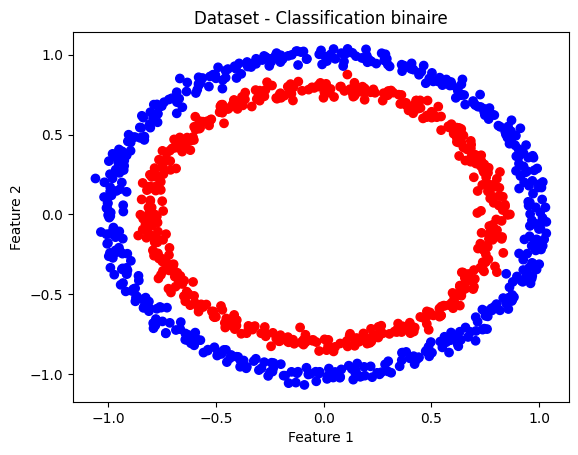

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset - Classification binaire')
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
print("Dimensions de X_train :", X_train.shape)
print("Dimensions de y_train :", y_train.shape)
print("Dimensions de X_test :", X_test.shape)
print("Dimensions de y_test :", y_test.shape)


Dimensions de X_train : (800, 2)
Dimensions de y_train : (800,)
Dimensions de X_test : (200, 2)
Dimensions de y_test : (200,)


In [9]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
50/50 - 1s - 15ms/step - accuracy: 0.5050 - loss: 0.7348 - val_accuracy: 0.4700 - val_loss: 0.7251
Epoch 2/100
50/50 - 0s - 2ms/step - accuracy: 0.4888 - loss: 0.7256 - val_accuracy: 0.4500 - val_loss: 0.7206
Epoch 3/100
50/50 - 0s - 2ms/step - accuracy: 0.4888 - loss: 0.7198 - val_accuracy: 0.4350 - val_loss: 0.7178
Epoch 4/100
50/50 - 0s - 2ms/step - accuracy: 0.4800 - loss: 0.7158 - val_accuracy: 0.4500 - val_loss: 0.7160
Epoch 5/100
50/50 - 0s - 2ms/step - accuracy: 0.4737 - loss: 0.7131 - val_accuracy: 0.4300 - val_loss: 0.7147
Epoch 6/100
50/50 - 0s - 2ms/step - accuracy: 0.4712 - loss: 0.7110 - val_accuracy: 0.4350 - val_loss: 0.7137
Epoch 7/100
50/50 - 0s - 2ms/step - accuracy: 0.4762 - loss: 0.7096 - val_accuracy: 0.4350 - val_loss: 0.7128
Epoch 8/100
50/50 - 0s - 2ms/step - accuracy: 0.4762 - loss: 0.7082 - val_accuracy: 0.4250 - val_loss: 0.7120
Epoch 9/100
50/50 - 0s - 2ms/step - accuracy: 0.4825 - loss: 0.7070 - val_accuracy: 0.4200 - val_loss: 0.7113
Epoch 10/

In [18]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print("Train Loss :", loss)
print("Train Accuracy :", accuracy)

Train Loss : 0.6736958026885986
Train Accuracy : 0.5387499928474426


In [32]:
def plot_decision_boundary(X, y, model):
    h = 0.02  # Pas de la grille
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Convertir les prédictions en une matrice 2D
    Z = Z.reshape(xx.shape)

    # Tracer les frontières de décision
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.colorbar()


In [33]:
def plot_decision_boundary_final(X_train, X_test, y_test, y_train, model):   
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plot_decision_boundary(X_train, y_train, model)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary - Training Set')
    
    # Tracer les frontières de décision pour l'ensemble de test
    plt.subplot(1, 2, 2)
    plot_decision_boundary(X_test, y_test, model)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary - Test Set')
    
    plt.tight_layout()
    plt.show()


417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step
392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step


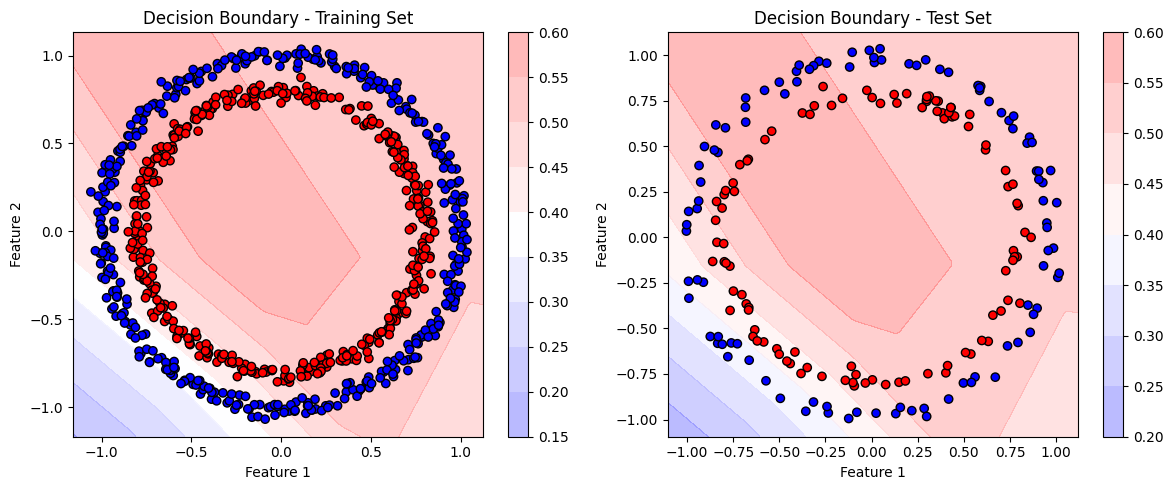

In [34]:
plot_decision_boundary_final(X_train, X_test, y_test, y_train, model)

In [19]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss :", loss)
print("Test Accuracy :", accuracy)

Test Loss : 0.6909645795822144
Test Accuracy : 0.48500001430511475


In [21]:
# second try : 
model2 = Sequential()
model2.add(Input(shape=(2,)))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [22]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
model2.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
50/50 - 1s - 17ms/step - accuracy: 0.4800 - loss: 0.6904 - val_accuracy: 0.5000 - val_loss: 0.6946
Epoch 2/100
50/50 - 0s - 2ms/step - accuracy: 0.5225 - loss: 0.6872 - val_accuracy: 0.5200 - val_loss: 0.6916
Epoch 3/100
50/50 - 0s - 3ms/step - accuracy: 0.5475 - loss: 0.6847 - val_accuracy: 0.5250 - val_loss: 0.6899
Epoch 4/100
50/50 - 0s - 3ms/step - accuracy: 0.5525 - loss: 0.6828 - val_accuracy: 0.5150 - val_loss: 0.6878
Epoch 5/100
50/50 - 0s - 3ms/step - accuracy: 0.5150 - loss: 0.6802 - val_accuracy: 0.5250 - val_loss: 0.6860
Epoch 6/100
50/50 - 0s - 3ms/step - accuracy: 0.5825 - loss: 0.6768 - val_accuracy: 0.5850 - val_loss: 0.6820
Epoch 7/100
50/50 - 0s - 2ms/step - accuracy: 0.6650 - loss: 0.6738 - val_accuracy: 0.6250 - val_loss: 0.6793
Epoch 8/100
50/50 - 0s - 2ms/step - accuracy: 0.6300 - loss: 0.6709 - val_accuracy: 0.5750 - val_loss: 0.6770
Epoch 9/100
50/50 - 0s - 3ms/step - accuracy: 0.6900 - loss: 0.6674 - val_accuracy: 0.6500 - val_loss: 0.6740
Epoch 10/

In [24]:
loss, accuracy = model2.evaluate(X_train, y_train, verbose=0)
print("Train Loss :", loss)
print("Train Accuracy :", accuracy)

Train Loss : 0.16194477677345276
Train Accuracy : 1.0


In [25]:
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print("Test Loss :", loss)
print("Test Accuracy :", accuracy)

Test Loss : 0.2092023640871048
Test Accuracy : 1.0


417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step
392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step


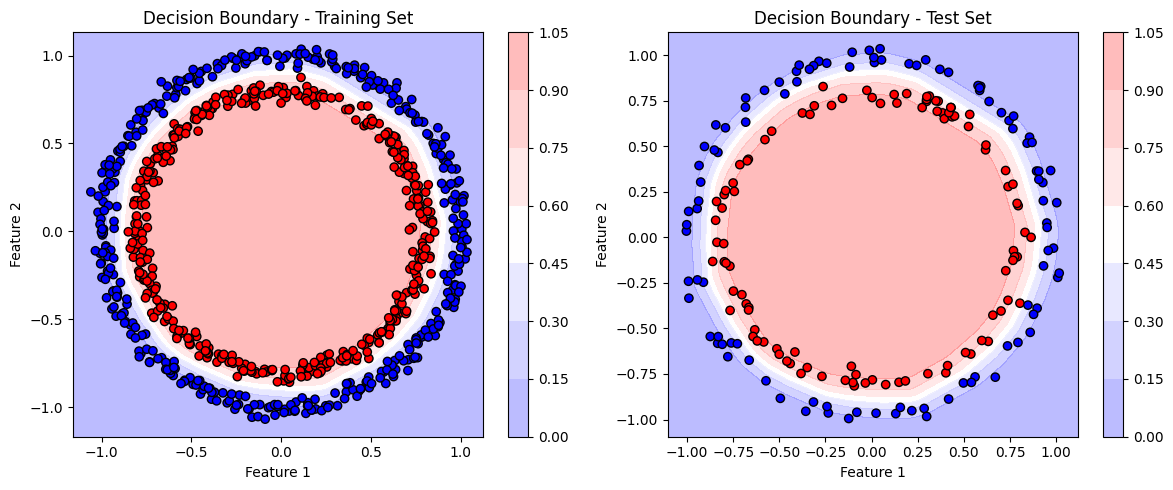

In [35]:
plot_decision_boundary_final(X_train, X_test, y_test, y_train, model2)

Multi-class classification

In [37]:
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=42)

In [38]:
print("Dimensions de l'entrée :", X.shape)
print("Dimensions de la sortie :", y.shape)


Dimensions de l'entrée : (1000, 2)
Dimensions de la sortie : (1000,)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensions de X_train :", X_train.shape)
print("Dimensions de y_train :", y_train.shape)
print("Dimensions de X_test :", X_test.shape)
print("Dimensions de y_test :", y_test.shape)

Dimensions de X_train : (800, 2)
Dimensions de y_train : (800,)
Dimensions de X_test : (200, 2)
Dimensions de y_test : (200,)


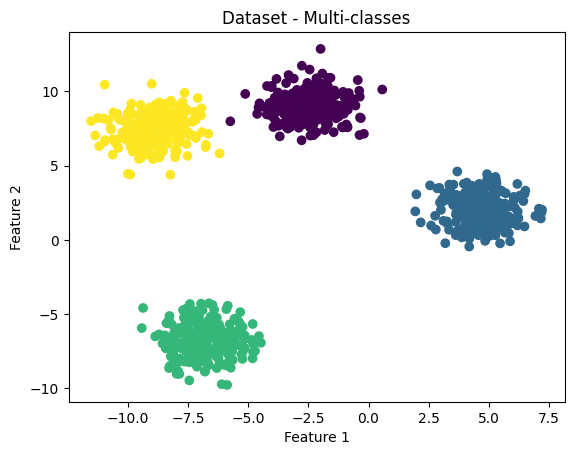

In [39]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset - Multi-classes')
plt.show()


In [45]:
model3 = Sequential()
model3.add(Input(shape=(2,)))
model3.add(Dense(50, activation='relu'))
model3.add(Dense(4, activation='softmax'))

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
history = model3.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100


50/50 - 1s - 16ms/step - accuracy: 0.7663 - loss: 0.8146 - val_accuracy: 1.0000 - val_loss: 0.3155
Epoch 2/100
50/50 - 0s - 2ms/step - accuracy: 0.9987 - loss: 0.1926 - val_accuracy: 1.0000 - val_loss: 0.1304
Epoch 3/100
50/50 - 0s - 2ms/step - accuracy: 0.9987 - loss: 0.0965 - val_accuracy: 1.0000 - val_loss: 0.0763
Epoch 4/100
50/50 - 0s - 2ms/step - accuracy: 0.9987 - loss: 0.0619 - val_accuracy: 1.0000 - val_loss: 0.0515
Epoch 5/100
50/50 - 0s - 2ms/step - accuracy: 0.9987 - loss: 0.0433 - val_accuracy: 1.0000 - val_loss: 0.0365
Epoch 6/100
50/50 - 0s - 2ms/step - accuracy: 0.9987 - loss: 0.0327 - val_accuracy: 1.0000 - val_loss: 0.0284
Epoch 7/100
50/50 - 0s - 2ms/step - accuracy: 0.9987 - loss: 0.0258 - val_accuracy: 1.0000 - val_loss: 0.0227
Epoch 8/100
50/50 - 0s - 2ms/step - accuracy: 0.9987 - loss: 0.0211 - val_accuracy: 1.0000 - val_loss: 0.0177
Epoch 9/100
50/50 - 0s - 2ms/step - accuracy: 0.9987 - loss: 0.0177 - val_accuracy: 1.0000 - val_loss: 0.0151
Epoch 10/100
50/50 - 

In [43]:
loss, accuracy = model3.evaluate(X_train, y_train, verbose=0)
print("Train Loss :", loss)
print("Train Accuracy :", accuracy)

Train Loss : 0.0016999184153974056
Train Accuracy : 0.9987499713897705


In [44]:
loss, accuracy = model3.evaluate(X_test, y_test, verbose=0)
print("Test Loss :", loss)
print("Test Accuracy :", accuracy)

Test Loss : 0.0003837048134300858
Test Accuracy : 1.0


In [67]:
# plot the separation boundary
def plot_decision_boundary_multi_class(X, y, model):
    h = 0.02  # Pas de la grille
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    # Convertir les prédictions en une matrice 2D
    Z = Z.reshape(xx.shape)

    # Tracer les frontières de décision
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.colorbar()

In [68]:
# plot the decision boundary
def plot_decision_boundary_final_multi_class(X_train, X_test, y_test, y_train, model):   
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plot_decision_boundary_multi_class(X_train, y_train, model)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary - Training Set')
    
    # Tracer les frontières de décision pour l'ensemble de test
    plt.subplot(1, 2, 2)
    plot_decision_boundary_multi_class(X_test, y_test, model)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary - Test Set')
    
    plt.tight_layout()
    plt.show()

33862/33862 ━━━━━━━━━━━━━━━━━━━━ 24s 711us/step
27941/27941 ━━━━━━━━━━━━━━━━━━━━ 20s 706us/step


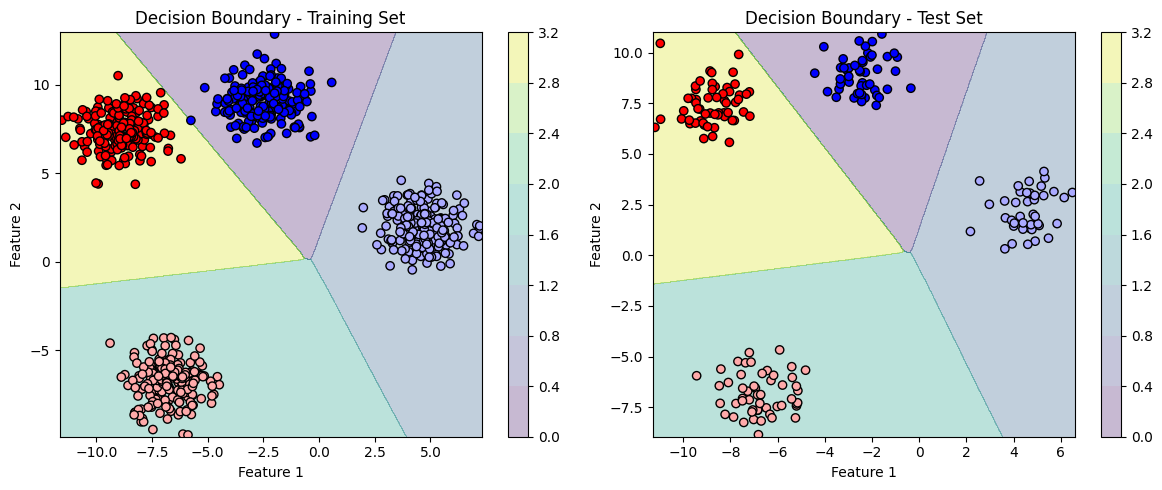

In [69]:
plot_decision_boundary_final_multi_class(X_train, X_test, y_test, y_train, model3)